# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [29]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.57 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.00 * np.pi
phiE = 0.00 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

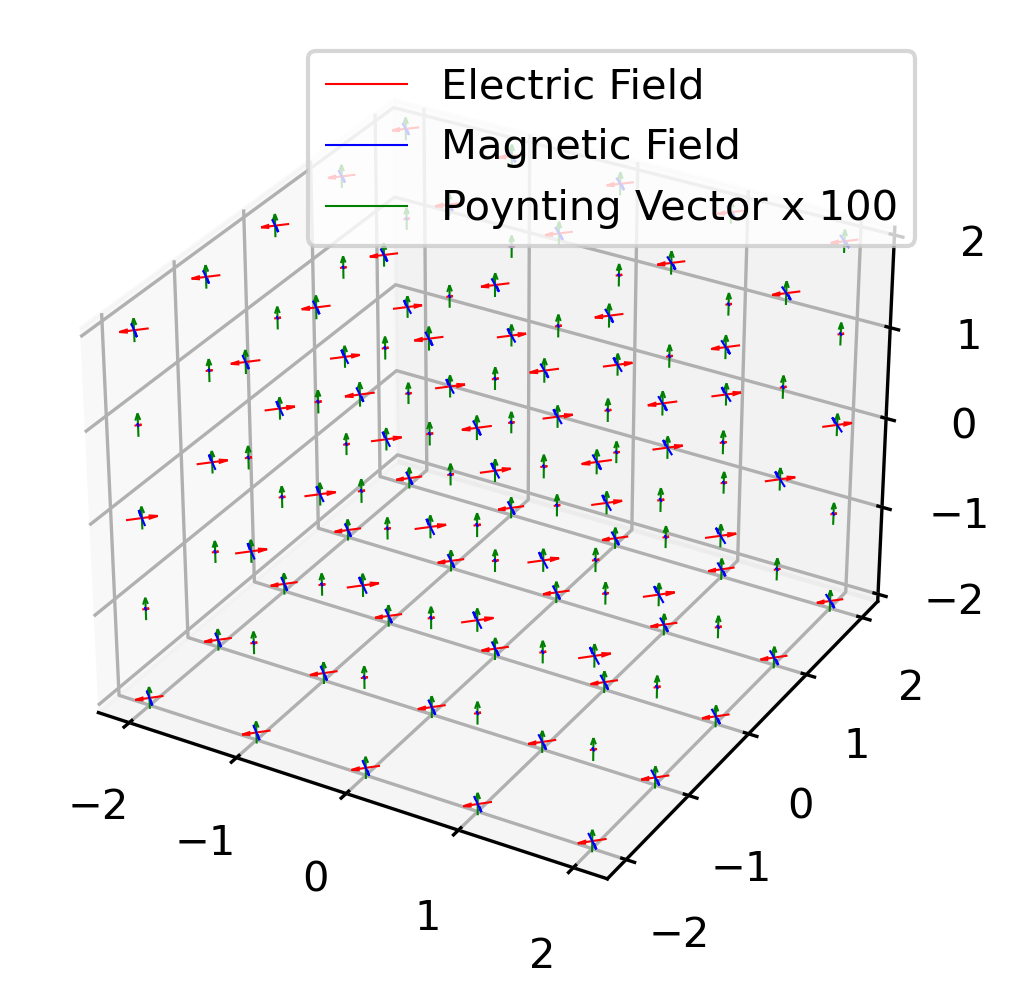

In [20]:
# Plot the field.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

**Observation**
I was trying to make the plot less cluttered, thinking to either make the axis steps further apart or have field lines shown less often, but I couldn't find the code for that, so I changed the values of Ex Ey Ez; thi sis definitely not what I needed, but it showed a clear dependence of the other two on the electric field, which was cool.

After that, I set them all back and found how to change box size, which readjusted the grid and showed easier-to-look at vectors. (increasing box size made the plot more visible; making a smaller box made the vectors harder to look at)

Finally, I found and adjusted num_points. Just for fun, I changed it from 11 to 110, but my laptop had a very hard time running it, so I dropped it to 5 instead, and that made the plot very nice, and the vectors much easier to interpret! 

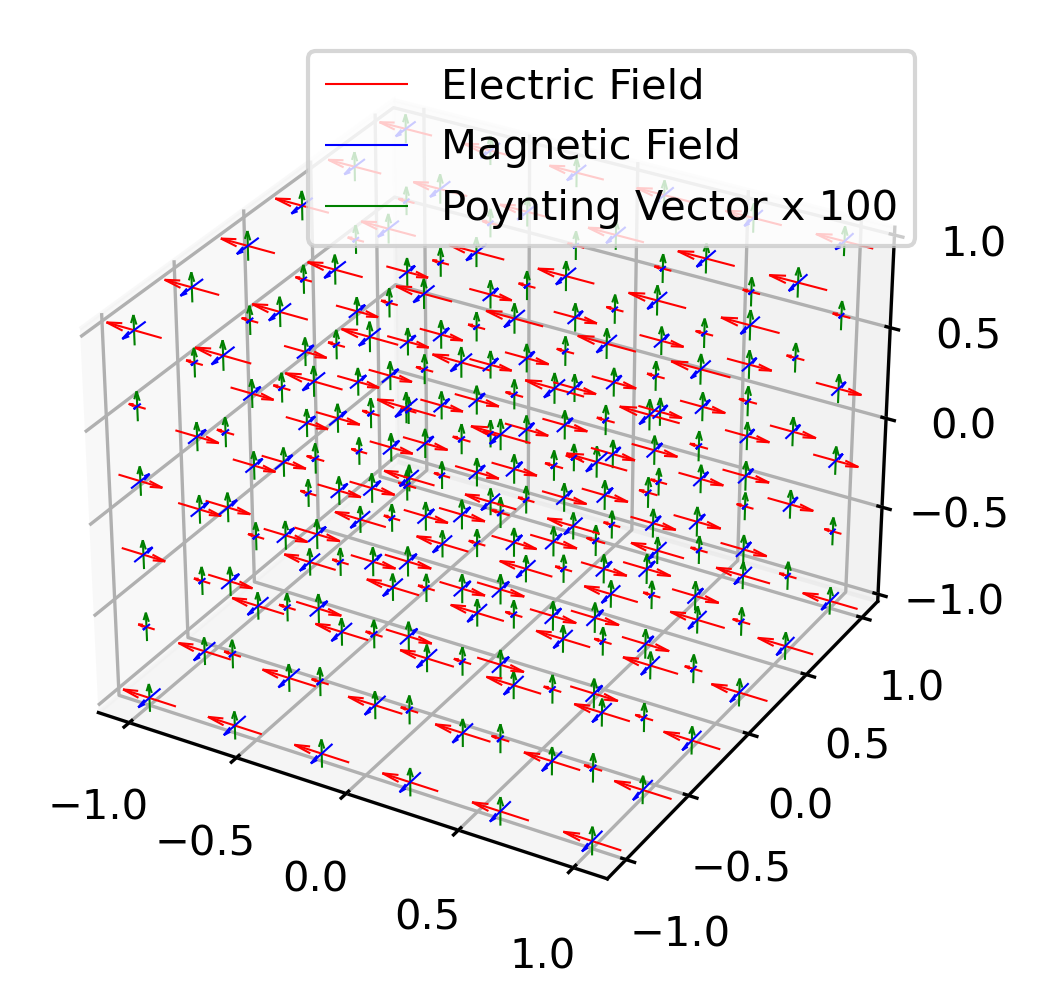

In [11]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Define Magnitude of wave vector
k = np.pi
theta = 0.0 * np.pi
phi = 0.0 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

(I left some observations between the plots as well)

- In what direction does the electric field point?
    - In both fields, **E** points along the x-axis. In the first plot, it's more in the positive direction, with some field vectors going in the other direction. In the second, it's the opposite.
- In what direction does the magnetic field point?
    - **B** is along y-axis for both. Again, it varies based on **E**; when **E** points in the positive x-direction, **B** points also positive; likewise, when **E** points in the negative x-direction, **B** points also negative
- In what direction does the Poynting vector point?
    - Poynting vector is along z-axis. Strangely, it is always pointing up, reglardless of the sign of **E** and **B**. I also noticed that when **E** and **B** get smaller, **S** stays larger.
- How does this change as you move along the x, y, and z axes?
    - In the first field, it's a little harder to visualize, but it looks like **E** and **B** are strongest in lines, and there are clear stripes between strong **E** and **B** and weak **E** and **B**
    - In the second, moving outward from (0,0,0) gives a smaller **E** and **B** but a constant **S**. 

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

Looking at the last plot above, there was no k-value that I could find, so I added a section for "magnitude of wave vector' and defined it as k = 2.00 * np.pi. This actually changed a lot in direction and magnitude. **E** and **B** are now ~45 degrees off from when k=pi, and the magnitude is much mroe consistent, just with some random points where **E** and **B** are small (I can't find any pattern to this). Through this change, Poynting vector stayed the same as when k=pi. It's very reliable

Looking back, I completely took out the k-value I added, and now **E** and **B** are stuck in place, so I think my k may have messed something up, or actually had no effect. Which would explain the issue I have below with k = pi/2

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

These look much more similar than I expected. I don't think anything changed

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

**Observations**
 - I changed k back to 𝜋 and set theta = 0.25 * np.pi and phi = 0.25 * np.pi
  - This caused all the poynting vetors to tilt in the y direction. That's pretty cool.
  - I'm not sure if it's the view of the plot and angle of **B** but the magnetic field looks super small in most places, while the **S** and **E** stayed similar in length. However, at a few points, **E** and **B** all but diappeared, leaving just **S**
 - I set theta = 0.25 * np.pi and phi = 0.50 * np.pi, which left very clear lines of high and low **E** and **B**

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

*I worked on just the upper plot for these*

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
 - phiE = 1  -> no change
 - phiE = -1 -> very very siomilar, but now **E** and **B** are pointing in the opposite directiion
 - phiE = 0.5 -> **BB** and **E** swap axes
 - phiE = 0.25 -> **E** and **B** spun around to be about 45 degrees off from x,y axis lines, rather than parallel to them
 - Through all changes, **S** stayed the same
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
 - Starting with thetaE = .50, the **E** is poitnign halfway between x and y; about half of the electric fiel vectors are pointing negative and the other half positive. **B** is very hard to see, but it's perpendicular to **E**
 - When thetaE = 1.00 all the directions appear the same, but about half of the **E** and **B** have disappeared
 - When thetaE = -1.00 didn't seem to make a change, like changing phi had
- What directions of the electric field give the smallest Poynting vectors?
 - I actually wasn't able to find a way to change the size of the poynting vector

## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

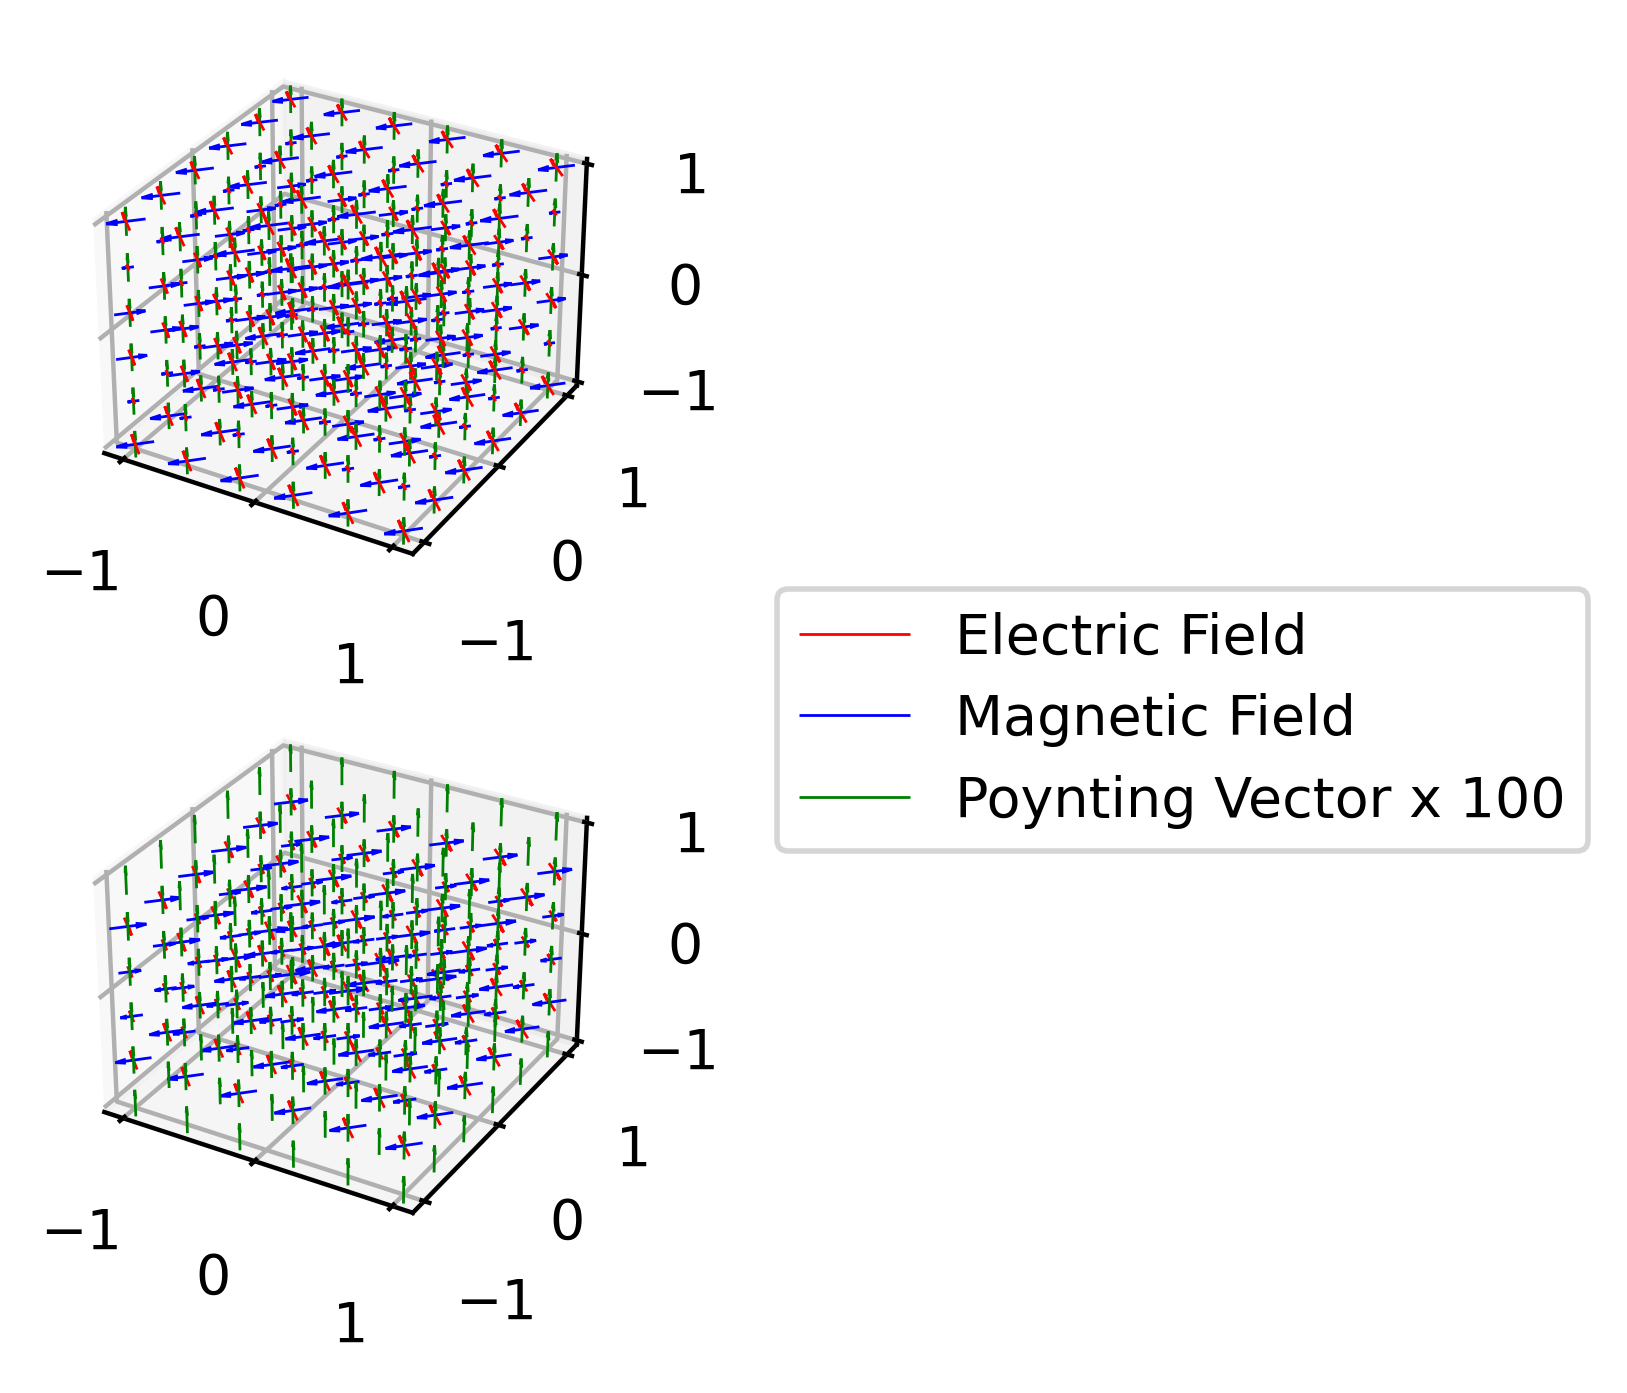

In [40]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1.00 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 0.25*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.25 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

when t1 = t0 + 0.25 * T the second plot has way less **E** and **B** making the poynting vector seem much more prominent
When t1 = t0 + .5 * T the plots look exactly the same
When t1 = t0 + .01 * T the plots still look exactly the same, which I did not expect.
Same results for t1 = t0 + T and when t1 = t0
The only time they weren't exactly the same was when t1 = t0 + .24 * T
Anytime after t1 = t0 + 0.33 * T the field plots become the same

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

Changing to the following directions of k almost completely got rid of poynting vector. I didn't see any effect of changing t1
- theta = 0.25 * np.pi
- phi = 0.00 * np.pi

Changing to the following directions of k gave us a little more Poynting vector, but I still see no change with t1
- theta = 0.25 * np.pi
- phi = 0.25 * np.pi

Changing to the following directions of k finally gave a difference related to time too. At t1 = t0 + 0.25 * T the outside "shell" of the lower plot is missing any **E** and **B**. Also **S** is now all pointing down.
- theta = 1 * np.pi
- phi = 1 * np.pi

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
 - For t1 = t0 + 1.25 * T **E** and **B** are both very inconsistent across the plot, but by t1 they seem to change places/axes (have rotated 90 degrees?)
 - For smaller time steps ie. t1 = t0 + .05 * T there is no visible change
 - Setting t1 = t0 + -1.25 * T give a very similar pattern, and the same **E** values but opposite **B** values it looks like
 - Overall the magnitudes seem to be the same in every context
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?
 - When alpha = 0 a lot of the poynting vectors no longer had **E** or **B** attached!

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

- I set alpha to pi (leaving t1 at t0 + 1.25 * T), which gave a very similar field as alpah = pi/2.
- I tried some alpha and t1 combos, and the most interesting thing I noticed was how alpha affects how quickly the fields change. When Alpha was just pi, the plots could change a lot more in just 0.25 seconds, compared to the other alpha values

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [59]:
# Name of file to store movie.
num_frames = 500

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 0.5 * np.pi
theta = 0.00 * np.pi
phi = 0.25 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.5
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 2 * np.pi

In [60]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = (kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    print("%s saved ..." % file_name.format(i))
    plt.close(fig)

000_movie.jpg saved ...
001_movie.jpg saved ...
002_movie.jpg saved ...
003_movie.jpg saved ...
004_movie.jpg saved ...
005_movie.jpg saved ...
006_movie.jpg saved ...
007_movie.jpg saved ...
008_movie.jpg saved ...
009_movie.jpg saved ...
010_movie.jpg saved ...
011_movie.jpg saved ...
012_movie.jpg saved ...
013_movie.jpg saved ...
014_movie.jpg saved ...
015_movie.jpg saved ...
016_movie.jpg saved ...
017_movie.jpg saved ...
018_movie.jpg saved ...
019_movie.jpg saved ...
020_movie.jpg saved ...
021_movie.jpg saved ...
022_movie.jpg saved ...
023_movie.jpg saved ...
024_movie.jpg saved ...
025_movie.jpg saved ...
026_movie.jpg saved ...
027_movie.jpg saved ...
028_movie.jpg saved ...
029_movie.jpg saved ...
030_movie.jpg saved ...
031_movie.jpg saved ...
032_movie.jpg saved ...
033_movie.jpg saved ...
034_movie.jpg saved ...
035_movie.jpg saved ...
036_movie.jpg saved ...
037_movie.jpg saved ...
038_movie.jpg saved ...
039_movie.jpg saved ...
040_movie.jpg saved ...
041_movie.jpg sa

342_movie.jpg saved ...
343_movie.jpg saved ...
344_movie.jpg saved ...
345_movie.jpg saved ...
346_movie.jpg saved ...
347_movie.jpg saved ...
348_movie.jpg saved ...
349_movie.jpg saved ...
350_movie.jpg saved ...
351_movie.jpg saved ...
352_movie.jpg saved ...
353_movie.jpg saved ...
354_movie.jpg saved ...
355_movie.jpg saved ...
356_movie.jpg saved ...
357_movie.jpg saved ...
358_movie.jpg saved ...
359_movie.jpg saved ...
360_movie.jpg saved ...
361_movie.jpg saved ...
362_movie.jpg saved ...
363_movie.jpg saved ...
364_movie.jpg saved ...
365_movie.jpg saved ...
366_movie.jpg saved ...
367_movie.jpg saved ...
368_movie.jpg saved ...
369_movie.jpg saved ...
370_movie.jpg saved ...
371_movie.jpg saved ...
372_movie.jpg saved ...
373_movie.jpg saved ...
374_movie.jpg saved ...
375_movie.jpg saved ...
376_movie.jpg saved ...
377_movie.jpg saved ...
378_movie.jpg saved ...
379_movie.jpg saved ...
380_movie.jpg saved ...
381_movie.jpg saved ...
382_movie.jpg saved ...
383_movie.jpg sa

In [56]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-amf --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt
  libavutil 

In [62]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")

Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

- With initial conditions, the poynting vector stays still while electric and magnetic vectors both rotate around and tilt as they do so.
- When k = 0, there are no vectors!
- With k having equal theta and phi, the vectors tilt *way* more and the Poynting vector is finally tilted in a new direction (either that or it disappeared, but I think it's pointing directly out of the screen, making it very hard to see)
 - I set k back and set alpha and 𝐸⃗ 0 equal (0.50). This didn't seem to change anything
 - I set E to .50 but alpha to 2 and the Poynting vector got giant! 
 - Then my laptop decided it didn't want to run more videos, so I took that as a sign to call it a night.

- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

- Linear polarization is simplest, which makes sense. The direction of **E** is constant in space and time
- A circularly polarize field has equal amplitudes of all components, but the phases differ by pi/2. 
- Is similar to harmonic motion!
- I'm not entirely sure on the application of any though

Why is it called an "electromagnetic plane wave"?

EM waves are constant over a plane perpendicular to both **E** and **B**

# Reflection and Summary

- What are the major takeaways of this assignment for you? *How much of an impcat the wave constant has, even in this complex scenario, and how applicable Maxwell's work was to literally everything*
- What was the most difficult part of this assignment? *It was just really long
- What was the most interesting part of this assignment? *I was really interested seeing how consistent the Poynting vector was, but it makes sense based on the discussions we've had in class*
- What questions do you have? *How do you change the Poynting vector? I know it's B X E but changing variables that change E didn't seem to affect it*